<b>Data Description:</b><br>
Data Source:<br>
- This data is acquired from https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit?gid=1150341366#gid=1150341366 as .xlsx file and converted to data.csv file.<br>
- This dataset contains the following columns:<br>
1.	Id:	To count the records.<br>
2.	MSSubClass:	 Identifies the type of dwelling involved in the sale.<br>
3.	MSZoning:	Identifies the general zoning classification of the sale.<br>
4.	LotArea:	 Lot size in square feet.<br>
5.	LotConfig:	Configuration of the lot<br>
6.	BldgType:	Type of dwelling<br>
7.	OverallCond:	Rates the overall condition of the house<br>
8.	YearBuilt:	Original construction year<br>
9.	YearRemodAdd:	Remodel date (same as construction date if no remodeling or additions).<br>
11.	BsmtFinSF2:	Type 2 finished square feet.<br>
12.	TotalBsmtSF:	Total square feet of basement area<br>
13.	SalePrice:	To be predicted<br>
<b>Data Question:</b><br>
- What factors are significant in predciting sale price of houses? And what price is the house based on given factors's information?<br>
The response variable: SalePrice<br>
The possible predictors:  MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF<br>


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib
# import plotly.express as px
# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load and show the first 10 rows of the data to see data's structure
df = pd.read_csv('data.csv')
df.head(10)

Using matplotlib backend: module://matplotlib_inline.backend_inline


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [2]:
# Check data type of each variable an correct the data type
df.info()

# Drop Id column
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)
    
# Count categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool'])
print(f'Number of categorical columns: {len(categorical_columns.columns)}')
print(categorical_columns.columns)

# Count numeric columns:
numeric_columns = df.select_dtypes(include=['number'])
print(f'Number of numeric columns: {len(numeric_columns.columns)}')
print(numeric_columns.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
Number of categorical columns: 4
Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
Number of numeric columns: 8
Index(['MSSubClass', 'LotArea', 'OverallCond',

- This dataset has 2919 entries and 13 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

In [3]:
# Check data statistic of numeric variables
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [4]:
# Check missing/null values of data
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

- MSZoning has 4 null values<br>
- Exterior1st has 1 null values<br>
- BsmtFinSF2 has 1 null values<br>
- TotalBsmtSF has 1 null values<br>
- SalePrice has 1459 null values<br>

In [5]:
# Replace null values with mean values and remove duplicate rows if any in the dataset
df. drop_duplicates(inplace=True)

# Fill na for categorical variables
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)

# Fill na for numeric variables
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace = True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace = True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace = True)
df.shape

(2911, 12)

After cleaning:<br>
- This dataset has 2911 entries and 12 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

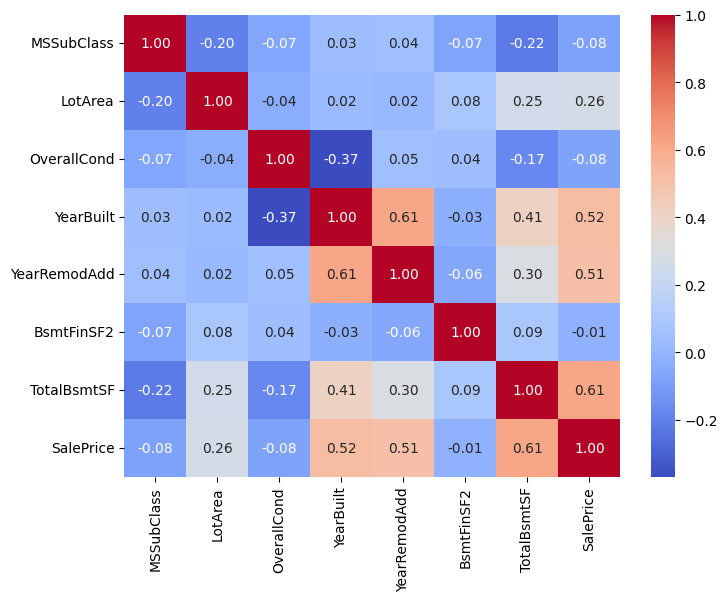

In [18]:
# Explore relationship between SalePrice and other numeric variables
import seaborn as sns

corr_matrix = numeric_columns.corr()
plt.figure(figsize= (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

According to the correlation heatmap, SalePrice has moderate relationship with YearBuilt, YearRemodAdd, TotalBSmtSF. SalePrice also has weak relationship with LotArea